# TV Nova project
- fill the description

### Task 1 - data analysis

#### Project Description

- Please download the data.
- Analyze the data and try to draw conclusions about the channels.
- We have selected four channels (”channel id”) for you.
- The time column is labelled ”timeslot datetime from” and the ID column of the movies is labelled ”main indent”.
- This task encourages the use of Python, but it is not a requirement.

#### Solution
- analyze the data 
 - undertand it (check number of rows and columns),
 - data types, missing values, empty columns, etc.

#### COLUMNS ####
- **channel_id**: channels (like Nova Cinema, Nova Sport, Nova Gold)
- **timeslot_datetime_from**: time slot for each movie
- **main_ident**: ID for movies

#### Attached files
- **XXX.py**: This script scraping data from ...


### Task 2 - Prediction

#### Project Description

- There are two targets: ”share 15 54”, which we aim to predict, and ”share 15 54 3mo mean”, which is trivial to predict.
- Utilize the features and time column (”timeslot datetime from”) to predict ”share 15 54” without using ”share 15 54 3mo mean”.
- For Data Scientist: you should be able to explain what influences the prediction for any model you produce and we want to improve the quality of prediction on future sample.


## Attached files
- **XXX.py**: This script scraping data from ...

### Task 3 - Improving prediction

#### Project Description
- Leverage ”share 15 54 3mo mean” to enhance the prediction for ”share 15 54”.
- You may create any new features and use any black-box model that can be explained to a certain extent.
- Explain why you chose the model you did.
- Consider the cost of running such a model, and weigh its pros and cons.
- Use the last month for prediction, and explain on this sample where your model performs well and where it falls short.
- Suggest future steps for improving the data, features, and method used. 

In [5]:
# checking the data in CSV format

### 1. Data analysis

#### COLUMNS ####
- **channel_id**: channels (like Nova Cinema, Nova Sport, Nova Gold)
- **timeslot_datetime_from**: provides information about when the program or movie was aired
- **main_ident**: ID for movies
- **chX_X__X**: connected with channel_id (e.g. from **ch3__f_1** to	**ch3__f_12** are months for each channel)
- **share_15_54**: This column denotes the viewer share within the demographic group aged 15-54 for the specific timeslot and program.
- **share_15_54_3mo_mean**: This column represents the 3-month mean of viewer share within the demographic group aged 15-54. It could be used as a feature for predicting future viewer share.
- **ch9__f_1, ch9__f_2, ch9__f_3**: These columns appear to be features related to Channel 9. The specific meanings of these features would depend on the context provided by the dataset documentation or domain knowledge. They could represent various characteristics or attributes of the channel, such as programming genre, audience demographics, or marketing strategies.
- **ch3__f_1, ch3__f_2, ..., ch3__f_12**: Similarly, these columns represent features related to Channel 3. The suffix "_f_1", "_f_2", etc., may indicate different feature categories or types.
- **ch54__f_10, ch54__f_11, ch54__f_12**: These columns appear to be features related to Channel 54, following a similar naming convention as the previous channels.
- **ch4__f_1, ch4__f_2, ..., ch4__f_12**: These columns represent features related to Channel 4, again following a similar naming convention.

In [1]:
# showing the name of the csv files
ls

AI - Nova TV Interview Assignment_03_2024.pdf
data_1.csv
data_2.csv
tv_nova.ipynb


In [1]:
# libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Analysis of channels

In [10]:
# Step 3: Popular Timeslots
top_timeslots = selected_data.groupby(['channel_id', 'timeslot_datetime_from'])['share_15_54'].mean().nlargest(10)
print(top_timeslots)

channel_id  timeslot_datetime_from    
3           2023-04-15T23:15:00.000000    56.075580
            2022-10-14T18:40:00.000000    45.651997
            2022-06-17T18:55:00.000000    44.215332
            2023-04-15T23:30:00.000000    44.045630
            2022-06-10T18:55:00.000000    43.244210
            2022-06-24T18:30:00.000000    42.873590
            2022-01-07T19:50:00.000000    42.634933
            2023-04-20T19:55:00.000000    42.552696
            2022-06-06T19:45:00.000000    42.357580
            2023-09-18T22:45:00.000000    42.251170
Name: share_15_54, dtype: float64


Dealing with columns containing a high percentage of missing values is a common challenge in preparing data for training regression models. Here are several strategies you can consider:

Imputation: One approach is to fill in the missing values with estimated values. Common imputation techniques include replacing missing values with the mean, median, or mode of the column, or using more sophisticated methods such as k-nearest neighbors (KNN) imputation or regression imputation. However, imputation can introduce bias, so it's essential to carefully consider which method is appropriate for your data.

Feature Engineering: Instead of directly imputing missing values, you can create new features that capture the presence or absence of missing values in the original column. For example, you could add a binary indicator variable that takes the value 1 if the original column is missing and 0 otherwise.

Drop the Column: If a column has a very high percentage of missing values and you believe it does not contain valuable information for your regression model, you may choose to drop the column entirely. However, this decision should be made based on domain knowledge and careful consideration of the importance of the column to your model.

Advanced Imputation Techniques: Explore more advanced imputation techniques tailored to your specific data and problem domain. For example, if your dataset has a temporal component, you could use time-series imputation methods. Alternatively, you might train a machine learning model to predict missing values based on other features in the dataset.

Model-Based Imputation: Train a separate model to predict the missing values based on the other features in the dataset. This approach can be effective if there are strong relationships between the missing values and other variables.

Domain-Specific Knowledge: Leverage domain-specific knowledge to inform your imputation strategy. For example, if certain missing values can be logically inferred based on other variables in the dataset, you can use this information to fill in the missing values.


## Exploration

Data dimensions after loading: %s (34160, 53)
Number of duplicate rows found: 16252
Percentage of duplicate rows from the total: 47.576112412177984 %
Columns with all null values:
ch9__f_7     100.0
ch9__f_8     100.0
ch9__f_9     100.0
ch9__f_10    100.0
ch9__f_11    100.0
dtype: float64
Total number of rows: 34160
Number of rows containing null values after dropping empty columns: 27004


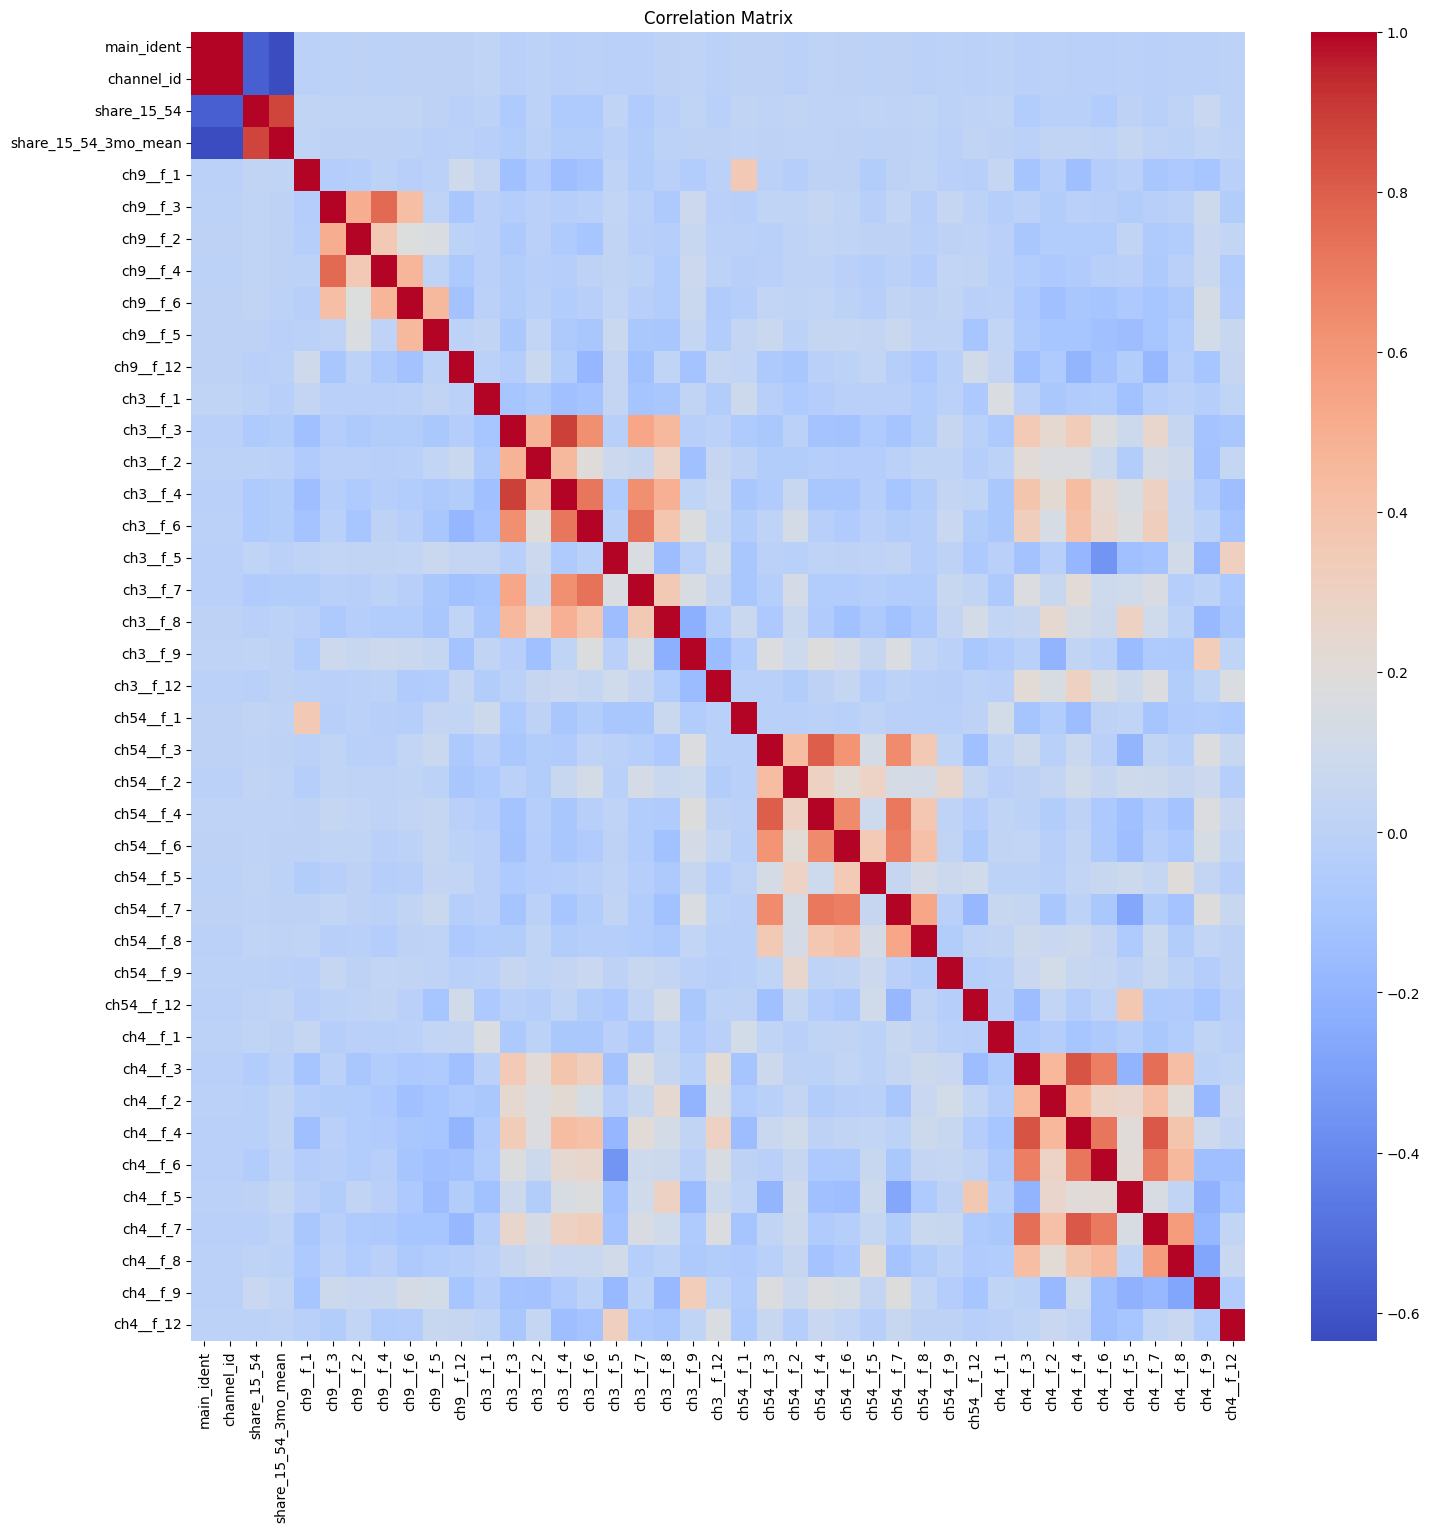

viewer_share_stats:              count       mean       std       min        25%        50%  \
channel_id                                                                
3           8545.0  21.713021  7.173833  3.370435  16.415508  20.709547   
4           7392.0  12.119126  5.567934  1.081633   8.305730  11.360578   
9           8753.0   5.392805  2.804186  0.000000   3.311694   4.943759   
54          9470.0   3.339186  2.148778  0.000000   1.754975   2.942778   

                  75%        max  
channel_id                        
3           26.431213  56.075580  
4           14.609236  35.846695  
9            6.852334  22.394554  
54           4.480616  15.493192  


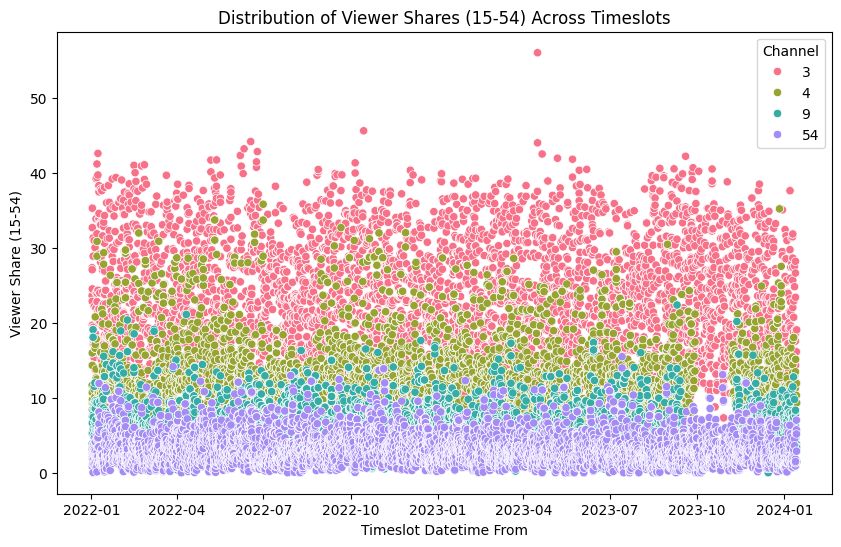

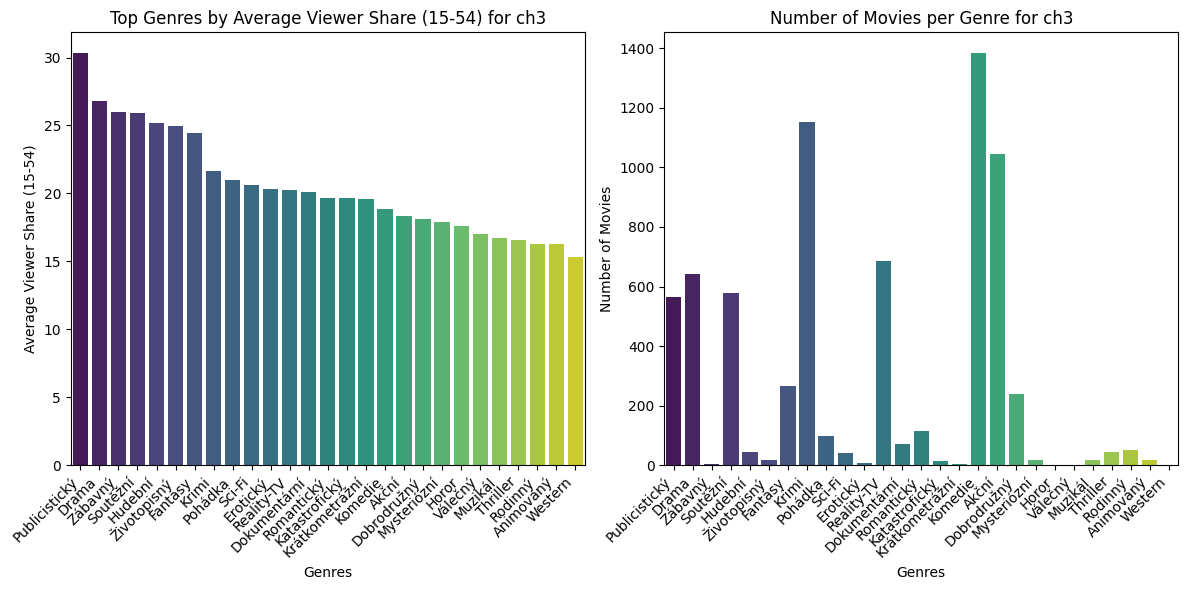

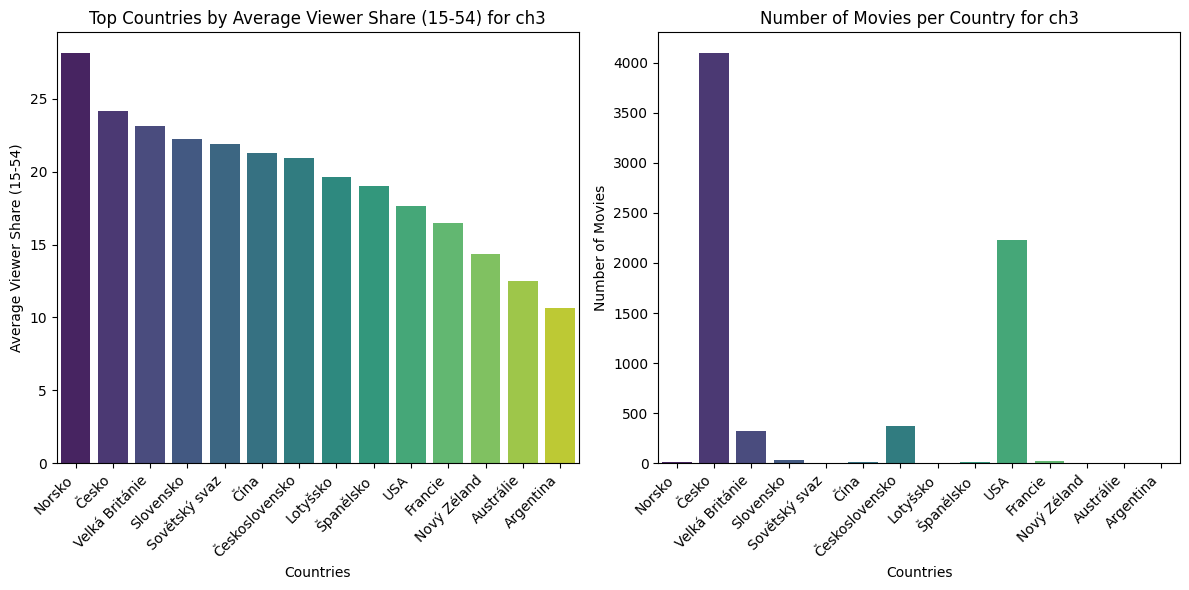

,main_ident,timeslot_datetime_from,channel_id,share_15_54,share_15_54_3mo_mean,ch9__f_1,ch9__f_3,ch9__f_2,ch9__f_4,ch9__f_6,...,ch4__f_2,ch4__f_4,ch4__f_6,ch4__f_5,ch4__f_7,ch4__f_8,ch4__f_9,ch4__f_10,ch4__f_11,ch4__f_12
0,32201011704400020,2022-01-01 17:10:00,3,23.645990,21.232685,0.335878,72.12605,119.0,62.073950,59.357143,...,45.0,56.068783,65.318184,22.0,75.0,13732.0,0.0,Pohádka,Česko,4.0
4,32201011704400020,2022-01-01 18:10:00,3,27.367630,27.094969,0.793893,72.12605,119.0,62.073950,59.357143,...,45.0,56.068783,65.318184,22.0,75.0,13732.0,0.0,Pohádka,Česko,4.0
8,32201011704400020,2022-01-01 18:45:00,3,27.100811,28.966300,0.093023,79.35714,28.0,76.428570,57.285713,...,45.0,56.068783,65.318184,22.0,75.0,13732.0,0.0,Pohádka,Česko,4.0
12,32201012020210020,2022-01-01 20:35:00,3,22.879704,22.640404,0.268908,60.11111,18.0,55.878067,49.250000,...,49.0,51.975850,57.500000,6.0,57.0,7917.0,0.0,Komedie,USA,NaN
13,32201012020210020,2022-01-01 20:35:00,3,22.879704,22.640404,0.268908,60.11111,18.0,55.878067,49.250000,...,49.0,51.975850,57.500000,6.0,57.0,7917.0,0.0,Komedie,USA,NaN


In [79]:
TASK_1_CSV_1 = "./data_1.csv"
TASK_1_CSV_2 = "./data_2.csv"

def load_csv_to_dataframe(file_path):
    """
    Load data from a CSV file into a pandas DataFrame.
    
    Parameters:
    - file_path (str): The path to the CSV file.
    
    Returns:
    - DataFrame: A pandas DataFrame containing the data from the CSV file.
    """
    try:
        # Load the CSV file into a DataFrame
        df = pd.read_csv(file_path, low_memory=False) # low_memory - handling mixed data type columns (non-numeric stored as an object)
        print("Data dimensions after loading: %s", df.shape)
        return df
    except FileNotFoundError:
        print("File not found. Please provide a valid file path.")
        return None


def sort_dataframe(df):
    """
    Sort a pandas DataFrame by channel_id, main_indent, and timeslot_datetime_from in ascending order.
    """
    sorted_df = df.sort_values(by=['channel_id', 'main_ident', 'timeslot_datetime_from'])
    return sorted_df

### GENERAL EXPLORATION PART ###

def statistics(df, describe=True, unique_count=False, missing_count=False, data_types=True):
    """
    Display statistics for a pandas DataFrame including count of unique values, count of missing values,
    and data types of columns.
    
    Parameters:
    - df (DataFrame): The pandas DataFrame for which extended statistics are to be calculated.
    """
    try:
        if describe:
            # Basic statistics for numerical columns
            print("Basic statistics for numerical columns:")
            print(df.describe())
        
        if unique_count:
            # Count of unique values for each column
            print("\nCount of unique values for each column:")
            print(df.nunique())
        
        if missing_count:
            # Count of missing values for each column
            print("\nCount of missing values for each column:")
            print(df.isnull().sum())
        
        if data_types:
            # Data types of columns
            print("\nData types of columns:")
            print(df.dtypes)
    except Exception as e:
        print("An error occurred:", e)


def assign_data_types(df):
    """
    Convert timeslot_datetime_from to timestamp format
    """
    df['timeslot_datetime_from'] = pd.to_datetime(df['timeslot_datetime_from'])
    return df


def find_duplicate_rows(df):
    """
    Find duplicate rows in a pandas DataFrame.
    
    Parameters:
    - df (DataFrame): The pandas DataFrame to be checked for duplicate rows.
    
    Returns:
    - DataFrame: The DataFrame with duplicate rows removed.
    """
    try:
        # Check for duplicate rows
        duplicate_rows = df[df.duplicated()]

        # If duplicate rows are found
        if not duplicate_rows.empty:
            num_duplicates = len(duplicate_rows)
            total_rows = len(df)
            duplicate_percentage = (num_duplicates / total_rows) * 100
            
            print("Number of duplicate rows found:", num_duplicates)
            print("Percentage of duplicate rows from the total:", duplicate_percentage, "%")
            
            return df
        else:
            print("No duplicate rows found.")
            return df
    except Exception as e:
        print("An error occurred:", e)
        return None


def null_percentage(df, just_nulls=False):
    """
    Calculate and display the percentage of null values for each column in a pandas DataFrame.
    
    Parameters:
    - df (DataFrame): The pandas DataFrame for which null percentages are to be calculated.
    - just_nulls (bool): If True, show only columns with all null values.
    """
    try:
        # Calculate the percentage of null values for each column
        null_percentages = (df.isnull().sum() / len(df)) * 100
        
        if just_nulls:
            # Filter columns with all null values
            null_columns = null_percentages[null_percentages == 100]
            if not null_columns.empty:
                print("Columns with all null values:")
                print(null_columns)
            else:
                print("No columns with all null values found.")
        else:
            # Display the percentage of null values for each column
            print("Percentage of null values for each column:")
            print(null_percentages)
    except Exception as e:
        print("An error occurred:", type(e).__name__, "-", e)


def count_rows_with_null(df):
    """
    Calculate the number of rows containing null values in a pandas DataFrame.
    
    Parameters:
    - df (DataFrame): The pandas DataFrame to be checked for null values.
    
    Returns:
    - int: The number of rows containing null values.
    """
    print("Total number of rows:", df.shape[0])
    # Drop columns containing just NULL values
    df = df.dropna(axis=1, how='all')
    # Calculate the number of rows containing null values
    rows_with_null = df.isnull().any(axis=1).sum()
    print("Number of rows containing null values after dropping empty columns:", rows_with_null)
    return rows_with_null


def visualize_correlation(df):
    """
    This function calculates the correlation matrix for numerical columns in the DataFrame
    and visualizes it using a heatmap.

    Args:
        df: A pandas DataFrame containing numerical columns.

    Returns:
        The correlation matrix heatmap is displayed directly.
    """
    # Filter out only numerical columns
    df = df.dropna(axis=1, how='all')
    numerical_df = df.select_dtypes(include=['number'])

    # Calculate correlation matrix
    correlation_matrix = numerical_df.corr()

    # Visualize correlations using heatmap
    plt.figure(figsize=(17, 17))
    sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Matrix')
    plt.show()



### EXPLORATION OF FEATURES AND CONCLUSIONS ###

# Viewership Trends
def calculate_viewer_share_stats(df):
    """
    Calculate descriptive statistics of viewer share for each channel.
    You can use these statistics to gain insights into the distribution of viewer share across different channels. 
    For example, you can identify:
        - channels with the highest average viewer share, 
        - channels with the most variability in viewer share, or 
        - channels with the highest and lowest viewer share ranges.
        - prumerna sledovat pro kanal (kde nejvetsi, kde nejmensi)
    
    Parameters:
    - df (DataFrame): The pandas DataFrame containing the data.

    Returns:
    - DataFrame: Descriptive statistics of viewer share for each channel.
    """
    try:
        viewer_share_stats = df.groupby('channel_id')['share_15_54'].describe()
        print('viewer_share_stats:', viewer_share_stats)
        return viewer_share_stats
    except Exception as e:
        print("An error occurred:", type(e).__name__, "-", e)


def plot_viewer_share_distribution(data):
    """
    This function visualizes the distribution of viewer shares across timeslots
    for all four channels using Matplotlib and Seaborn with different colors for each channel.

    Args:
        data: A pandas DataFrame containing the channel data.

    Returns:
        None. The plot is displayed directly.
    """
    # Define a custom color palette with different colors for each channel
    channel_colors = sns.color_palette("husl", n_colors=len(data['channel_id'].unique()))

    # Initialize the matplotlib figure and axis
    plt.figure(figsize=(10, 6))
    ax = plt.gca()

    # Create scatter plots for each channel using Seaborn and custom colors
    sns.scatterplot(data=data, x='timeslot_datetime_from', y='share_15_54', hue='channel_id', palette=channel_colors, ax=ax)

    # Set plot title and axis labels
    plt.title('Distribution of Viewer Shares (15-54) Across Timeslots')
    plt.xlabel('Timeslot Datetime From')
    plt.ylabel('Viewer Share (15-54)')

    # Show legend
    plt.legend(title='Channel')

    # Show plot
    plt.show()


def plot_genre_share(data):
    """
    This function visualizes the genres with the highest average share_15_54 (podil sledovanosti) and the number of movies per genre
    for channel_id = 3.
    
    Args:
        data: A pandas DataFrame containing the channel data.

    Returns:
        None. The plot is displayed directly.
    """
    # Filter data for channel_id = 3
    channel_3_data = data[data['channel_id'] == 3]

    # Group data by genre and calculate the average share_15_54 for each genre
    genre_stats = channel_3_data.groupby('ch3__f_10').agg({'share_15_54': 'mean', 'main_ident': 'count'}).reset_index()

    # Sort data by average share_15_54 in descending order
    sorted_data = genre_stats.sort_values(by='share_15_54', ascending=False)

    # Initialize the matplotlib figure and axis
    plt.figure(figsize=(12, 6))
    
    # Create bar plot for average share_15_54
    plt.subplot(1, 2, 1)
    sns.barplot(data=sorted_data, x='ch3__f_10', y='share_15_54', hue='ch3__f_10', palette='viridis', legend=False)
    plt.title('Top Genres by Average Viewer Share (15-54) for ch3')
    plt.xlabel('Genres')
    plt.ylabel('Average Viewer Share (15-54)')
    plt.xticks(rotation=45, ha='right')

    # Create bar plot for number of movies
    plt.subplot(1, 2, 2)
    sns.barplot(data=sorted_data, x='ch3__f_10', y='main_ident', hue='ch3__f_10', palette='viridis', legend=False)    
    plt.title('Number of Movies per Genre for ch3')
    plt.xlabel('Genres')
    plt.ylabel('Number of Movies')
    plt.xticks(rotation=45, ha='right')

    # Adjust layout
    plt.tight_layout()

    # Show plot
    plt.show()

def plot_country_share(data):
    """
    This function visualizes the countries with the highest average share_15_54 (podil sledovanosti) and the number of movies per country
    for channel_id = 3.

    Args:
        data: A pandas DataFrame containing the channel data.

    Returns:
        None. The plot is displayed directly.
    """
    # Filter data for channel_id = 3
    channel_3_data = data[data['channel_id'] == 3]

    # Group data by country and calculate the average share_15_54 and count of movies for each country
    country_stats = channel_3_data.groupby('ch3__f_11').agg({'share_15_54': 'mean', 'main_ident': 'count'}).reset_index()

    # Sort data by average share_15_54 in descending order
    sorted_data = country_stats.sort_values(by='share_15_54', ascending=False)

    # Initialize the matplotlib figure and axis
    plt.figure(figsize=(12, 6))

    # Create bar plot for average share_15_54
    plt.subplot(1, 2, 1)
    sns.barplot(data=sorted_data, x='ch3__f_11', y='share_15_54', hue='ch3__f_11', palette='viridis', legend=False)
    plt.title('Top Countries by Average Viewer Share (15-54) for ch3')
    plt.xlabel('Countries')
    plt.ylabel('Average Viewer Share (15-54)')
    plt.xticks(rotation=45, ha='right')

    # Create bar plot for number of movies
    plt.subplot(1, 2, 2)
    sns.barplot(data=sorted_data, x='ch3__f_11', y='main_ident', hue='ch3__f_11', palette='viridis', legend=False)
    plt.title('Number of Movies per Country for ch3')
    plt.xlabel('Countries')
    plt.ylabel('Number of Movies')
    plt.xticks(rotation=45, ha='right')

    # Adjust layout
    plt.tight_layout()

    # Show plot
    plt.show()


# Assuming you have a CSV file named "data.csv" in the current directory
df = load_csv_to_dataframe(file_path=TASK_1_CSV_1)
df = sort_dataframe(df=df)
statistics(df=df, describe=False, unique_count=False, missing_count=False, data_types=False)
df = assign_data_types(df=df)
df = find_duplicate_rows(df=df)
null_percentage(df=df, just_nulls=True)
count_rows_with_null(df=df)
visualize_correlation(df)

calculate_viewer_share_stats(df=df)
plot_viewer_share_distribution(data=df)
plot_genre_share(data=df)
plot_country_share(data=df)

df.head(5)

# BACK UP

In [ ]:
def null_percentage(df):
    """
    Calculate and display the percentage of null values for each column in a pandas DataFrame.
    
    Parameters:
    - df (DataFrame): The pandas DataFrame for which null percentages are to be calculated.
    """
    try:
        # Calculate the percentage of null values for each column
        null_percentages = (df.isnull().sum() / len(df)) * 100
        
        # Display the percentage of null values for each column
        print("Percentage of null values for each column:")
        print(null_percentages)
    except Exception as e:
        print("An error occurred:", e)

In [18]:
def find_and_drop_duplicate_rows(df):
    """
    Find and drop duplicate rows in a pandas DataFrame.
    
    Parameters:
    - df (DataFrame): The pandas DataFrame to be checked for duplicate rows.
    
    Returns:
    - DataFrame: The DataFrame with duplicate rows removed.
    """
    try:
        duplicate_rows = df[df.duplicated()]
        
        if not duplicate_rows.empty:
            num_duplicates = len(duplicate_rows)
            total_rows = len(df)
            duplicate_percentage = (num_duplicates / total_rows) * 100
            
            print("Number of duplicate rows found:", num_duplicates)
            print("Percentage of duplicate rows from the total:", duplicate_percentage, "%")
            
            # Drop duplicate rows
            cleaned_df = df.drop_duplicates()
            print("Duplicate rows dropped.")
            
            return cleaned_df
        else:
            print("No duplicate rows found.")
            return df.copy()  # Return a copy of the original DataFrame if no duplicates
    except Exception as e:
        print("An error occurred:", e)
        return None

cleaned_df = find_and_drop_duplicate_rows(df=sorted_df)

Number of duplicate rows found: 16252
Percentage of duplicate rows from the total: 47.576112412177984 %
Duplicate rows:
Duplicate rows dropped.


In [25]:
def drop_empty_columns(df):
    """
    Drop columns with no values (containing only null values) from a pandas DataFrame.
    
    Parameters:
    - df (DataFrame): The pandas DataFrame from which empty columns are to be dropped.
    
    Returns:
    - DataFrame: The DataFrame with empty columns removed.
    """
    # Drop columns with all null values
    cleaned_df = df.dropna(axis=1, how='all')
    return cleaned_df

cleaned_df = drop_empty_columns(df=cleaned_df)